# Pipeline Data understanding and preparation

## Libraries importeren

In [1]:
# imported libraries
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## DataFrame inladen

Laad het DataFrame in met de kolommen die gebruikt worden.

In [2]:
cols_to_use = [
    '#stm_sap_meldnr',
    'stm_geo_mld',
    'stm_prioriteit',
    'stm_geo_gst',
    'stm_oorz_groep',
    'stm_oorz_code',
    'stm_fh_ddt',
    'stm_contractgeb_mld',
    'stm_techn_mld',
    'stm_techn_gst',
    'stm_aanntpl_dd',
    'stm_aanntpl_tijd',
    'stm_progfh_in_duur',
    'stm_fh_dd',
    'stm_fh_tijd',
    'stm_fh_duur',
]

df = pd.read_csv("data/sap_storing_data_hu_project.csv", index_col=0, usecols=cols_to_use, engine='pyarrow')
df.head()

,stm_geo_mld,stm_prioriteit,stm_geo_gst,stm_oorz_groep,stm_oorz_code,stm_fh_ddt,stm_contractgeb_mld,stm_techn_mld,stm_techn_gst,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_duur,stm_fh_dd,stm_fh_tijd,stm_fh_duur
#stm_sap_meldnr,,,,,,,,,,,,,,,
0,None,NaN,None,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN
50053211,624.0,9.0,624.0,ONR-RIB,133.0,02/01/2006 09:00:00,NaN,None,S,None,00:00:00,99999999.0,02/01/2006,09:00:00,0.0
50053213,201.0,9.0,201.0,ONR-DERD,143.0,02/01/2006 13:26:00,NaN,None,B,None,00:00:00,99999999.0,02/01/2006,13:26:00,51.0
50053214,25.0,9.0,25.0,ONR-DERD,142.0,02/01/2006 17:20:00,NaN,None,B,None,00:00:00,99999999.0,02/01/2006,17:20:00,40.0
50053215,12.0,9.0,12.0,ONR-DERD,142.0,02/01/2006 22:36:00,NaN,None,B,None,00:00:00,99999999.0,02/01/2006,22:36:00,6.0


## Prepareren Target variabele

De gekozen target variabele is de tijd (in minuten) vanaf het moment dat de aannemer ter plaatse is tot functie herstel.

In [3]:
# alle relevante kolommen veranderen naar datetimes
df['stm_aanntpl_tijd'] = pd.to_datetime(df['stm_aanntpl_tijd'], format='%H:%M:%S', errors='coerce')
df['stm_aanntpl_dd'] = pd.to_datetime(df['stm_aanntpl_dd'], format='%d/%m/%Y', errors='coerce')
df['stm_fh_ddt'] = pd.to_datetime(df['stm_fh_ddt'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

df[['stm_aanntpl_tijd', 'stm_aanntpl_dd', 'stm_fh_ddt']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 898526 entries, 0 to 99999999
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   stm_aanntpl_tijd  898488 non-null  datetime64[ns]
 1   stm_aanntpl_dd    689915 non-null  datetime64[ns]
 2   stm_fh_ddt        732891 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 27.4 MB


In [4]:
df['stm_aanntpl_tijd'] = df['stm_aanntpl_tijd'].astype('str')
df['stm_aanntpl_dd'] = df['stm_aanntpl_dd'].astype('str')
# de twee kolommen samen voegen om er 1 datetime feature van te maken
df["aanntpl_ddt"] = df["stm_aanntpl_dd"] + " " + df["stm_aanntpl_tijd"].apply(lambda x: x.split(' ')[-1])
df['aanntpl_ddt'] = pd.to_datetime(df['aanntpl_ddt'], format='%Y-%m-%d %H:%M:%S', errors='coerce') 
print(df['aanntpl_ddt'].isna().sum())
df = df.dropna(subset=['aanntpl_ddt'])
df['aanntpl_ddt'].sample(30)

208611


#stm_sap_meldnr
80714520   2013-04-12 12:17:00
70322903   2017-11-24 03:52:01
80405319   2007-04-26 15:16:00
70271460   2017-04-28 08:15:01
80917084   2018-07-28 02:49:00
80768570   2014-06-16 09:55:00
80504222   2009-05-06 17:47:00
80673344   2012-06-30 05:20:00
80577989   2010-09-15 14:03:00
80849736   2016-05-31 01:30:00
80753530   2014-02-13 15:00:00
80777278   2014-08-25 23:30:00
80661087   2012-03-30 03:35:00
80468995   2008-08-18 12:00:00
80710247   2013-03-12 12:01:00
80875364   2017-01-01 09:22:01
80766095   2014-05-27 01:30:00
80367266   2006-07-12 10:57:00
80877086   2017-01-16 08:49:49
80771990   2014-07-14 07:08:00
80724712   2013-07-01 11:14:00
80818012   2015-08-29 21:00:00
80766731   2014-06-02 04:16:00
80666902   2012-05-14 14:14:00
80901909   2017-12-05 11:26:14
80618549   2011-06-05 21:00:00
80811173   2015-07-02 07:11:00
80448642   2008-03-22 06:34:00
80407491   2007-05-12 03:18:00
80615149   2011-05-11 10:35:00
Name: aanntpl_ddt, dtype: datetime64[ns]

In [5]:
# bereken de duur van aannemer ter plaatse tot functieherstel in minuten
df['anm_tot_fh'] = df['stm_fh_ddt'] - df['aanntpl_ddt']
df['anm_tot_fh'] = df['anm_tot_fh'].apply(lambda x: x.seconds/60 + x.days * (24*60))
df = df.dropna(subset=['anm_tot_fh'])
df['anm_tot_fh'].sample(30)


#stm_sap_meldnr
80671041        32.000000
80518806        97.000000
80727735        29.000000
80379231        71.000000
70310466         2.000000
80706457         3.000000
80563351       185.000000
70464471       130.550000
80407191        12.000000
80615980        50.000000
80563618       185.000000
80404975         8.000000
80620832        90.000000
80706815        94.000000
80418907       118.000000
80842318         6.283333
80885280     12365.566667
80343544        49.600000
80703548        34.000000
80514644        23.000000
80872815        12.000000
80871517         1.016667
80770164        45.000000
80363447    364333.000000
80785689         3.000000
70339577       145.200000
80600118       105.000000
80715579        27.000000
80699410        54.000000
80773568        43.000000
Name: anm_tot_fh, dtype: float64

In [6]:
# verwijder alle negatieve waardes, omdat dit er niet zo veel zijn
df = df[df['anm_tot_fh'] >= 0]

<Axes: >

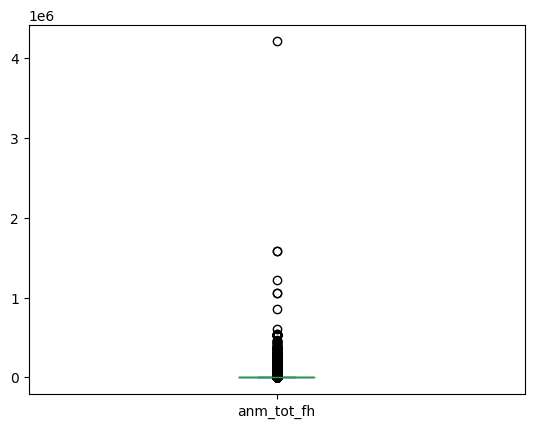

In [7]:
df['anm_tot_fh'].plot.box()

In [8]:
# Houdt alleen waardes vanaf 5 min tot en met 8 uur (480 min), andere waardes mogen genegeerd worden van de opdrachtgever.
df = df[(df['anm_tot_fh'] >= 5) & (df['anm_tot_fh'] <= 480)]
len(df)

544583

<Axes: >

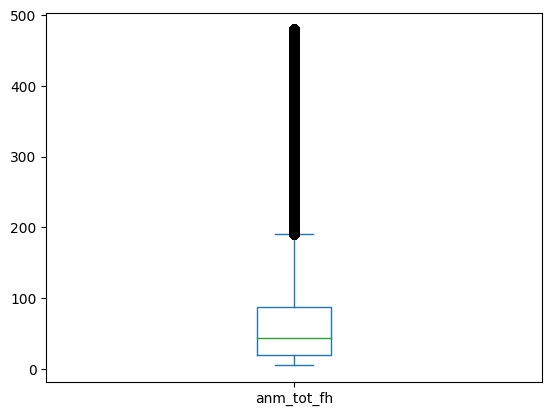

In [9]:
df['anm_tot_fh'].plot.box()

# Baseline
Voor de baseline is er gekozen om het gemiddelde te nemen van de target variable.

In [10]:
import baseline
baseline_rmse, baseline_r2 = baseline.calculate_baseline(df)

print('Baseline RMSE: ', baseline_rmse)
print('Baseline R2: ', baseline_r2)

Baseline RMSE:  76.65929392635941
Baseline R2:  0.0


# Resultaten
Hierboven is te zien dat de baseline een R2 score heeft van 0.0 en de MSE is ongeveer 5876.64. Dit is niet een goede score, maar goed genoeg voor een baseline.